# Notebook for exploring the heatmap results

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [14]:
base_dir = '../../'
paths = {
# standard resutls (internal, external)
'p1':'results/evaluation_test/plots/roc_summary_subsampled.csv',
# model pooling / ensembling:
'p2': 'results/evaluation_test/prediction_pooled_subsampled/max/plots/roc_summary_subsampled.csv',
# finetuned models:
'p3': 'results/finetuning/evaluation_test/plots/roc_summary_subsampled.csv'
}
paths = {key: os.path.join(base_dir, val) for key, val in paths.items()}

In [15]:
paths

{'p1': '../../results/evaluation_test/plots/roc_summary_subsampled.csv',
 'p2': '../../results/evaluation_test/prediction_pooled_subsampled/max/plots/roc_summary_subsampled.csv',
 'p3': '../../results/finetuning/evaluation_test/plots/roc_summary_subsampled.csv'}

In [18]:
dfs = {key: pd.read_csv(val) for key,val in paths.items()} 

In [26]:
dfs = {key: df.drop(columns='Unnamed: 0') for key, df in dfs.items()}

In [28]:
dfs['p3']['finetuned'] = True
dfs['p1']['finetuned'] = False
dfs['p2']['finetuned'] = False

In [55]:
df = pd.concat(dfs)

In [59]:
# we look at the attn model:
df = df.query("model == 'AttentionModel'")
# drop obsolete dataset (too heterogenous / low quality)
df = df.query("train_dataset != 'emory' & eval_dataset != 'emory'")

In [60]:
df

model train_dataset eval_dataset  auc_mean   auc_std  \
p1 0    AttentionModel          aumc         aumc  0.917711  0.003569   
   9    AttentionModel          aumc         eicu  0.698006  0.010686   
   22   AttentionModel          aumc        hirid  0.733108  0.013438   
   31   AttentionModel          aumc        mimic  0.685606  0.013133   
   40   AttentionModel          eicu         aumc  0.731821  0.007108   
   49   AttentionModel          eicu         eicu  0.802502  0.003536   
   62   AttentionModel          eicu        hirid  0.705312  0.026872   
   71   AttentionModel          eicu        mimic  0.714940  0.009202   
   100  AttentionModel         hirid         aumc  0.806525  0.014401   
   109  AttentionModel         hirid         eicu  0.705568  0.009348   
   122  AttentionModel         hirid        hirid  0.834322  0.002237   
   131  AttentionModel         hirid        mimic  0.648077  0.012512   
   140  AttentionModel         mimic         aumc  0.798606  0.022978   
   149  AttentionModel         mimic         eicu  0.753329  0.007784   
   162  AttentionModel         mimic        hirid  0.694860  0.010384   
   171  AttentionModel         mimic        mimic  0.831972  0.003256   
p2 0    AttentionModel        pooled         aumc  0.835573  0.010908   
   9    AttentionModel        pooled         eicu  0.759670  0.006823   
   18   AttentionModel        pooled        hirid  0.729156  0.013789   
   27   AttentionModel        pooled        mimic  0.720870  0.005167   
p3 0    AttentionModel          aumc         eicu  0.756370  0.007211   
   1    AttentionModel          aumc        hirid  0.792255  0.002184   
   2    AttentionModel          aumc        mimic  0.786427  0.002008   
   3    AttentionModel          eicu         aumc  0.846289  0.050213   
   4    AttentionModel          eicu        hirid  0.774104  0.001855   
   5    AttentionModel          eicu        mimic  0.789502  0.002433   
   6    AttentionModel         hirid         aumc  0.867947  0.010989   
   7    AttentionModel         hirid         eicu  0.761983  0.004556   
   8    AttentionModel         hirid        mimic  0.794380  0.002116   
   9    AttentionModel         mimic         aumc  0.894071  0.003426   
   10   AttentionModel         mimic         eicu  0.793121  0.003726   
   11   AttentionModel         mimic        hirid  0.797083  0.004061   

        finetuned  
p1 0        False  
   9        False  
   22       False  
   31       False  
   40       False  
   49       False  
   62       False  
   71       False  
   100      False  
   109      False  
   122      False  
   131      False  
   140      False  
   149      False  
   162      False  
   171      False  
p2 0        False  
   9        False  
   18       False  
   27       False  
p3 0         True  
   1         True  
   2         True  
   3         True  
   4         True  
   5         True  
   6         True  
   7         True  
   8         True  
   9         True  
   10        True  
   11        True

In [93]:
# mean internal AUC
auc_int_mean = df.query("train_dataset == eval_dataset & finetuned == False & train_dataset != 'pooled'")['auc_mean'].mean()
auc_int_std = df.query("train_dataset == eval_dataset & finetuned == False & train_dataset != 'pooled'")['auc_std'].mean() # use bootstraps for CI?

In [94]:
# mean pair-wise AUC (no finetuning, no pooling)
auc_pw_mean = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled'")['auc_mean'].mean()
auc_pw_std = df.query("train_dataset != eval_dataset & finetuned == False & train_dataset != 'pooled'")['auc_std'].mean()

In [95]:
# mean pooled AUC (no finetuning)
auc_po_mean = df.query("train_dataset == 'pooled' & finetuned == False")['auc_mean'].mean()
auc_po_std = df.query("train_dataset == 'pooled' & finetuned == False")['auc_std'].mean()


In [96]:
# mean finetuned AUC 
auc_ft_mean = df.query("train_dataset != 'pooled' & finetuned == True")['auc_mean'].mean()
auc_ft_std = df.query("train_dataset != 'pooled' & finetuned == True")['auc_std'].mean()


Text(20.75, 0.5, 'AUROC (mean $\\pm$ std)')

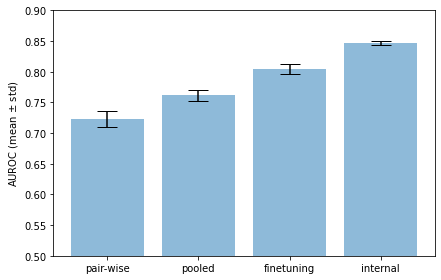

In [107]:
fig, ax = plt.subplots()
x_pos = np.arange(4)
aucs = [auc_pw_mean, auc_po_mean, auc_ft_mean, auc_int_mean]
stds = [auc_pw_std, auc_po_std, auc_ft_std, auc_int_std]

names = ['pair-wise', 'pooled', 'finetuning', 'internal']
ax.bar(x_pos, aucs, yerr=stds, align='center', alpha=0.5, ecolor='black', capsize=10)
ax.set_ylim(0.5,0.9)

ax.set_xticks(x_pos)
ax.set_xticklabels(names)
plt.tight_layout()
plt.ylabel(f'AUROC (mean $\pm$ std)')